In [1]:
import pandas as pd
import numpy as np

In [2]:
istanbul_dis_nufus = pd.read_csv('../data/ISTIlceDisNufus.csv')

In [3]:
istanbul_dis_nufus.rename(columns=lambda x: x[25:], inplace=True)

In [4]:
istanbul_dis_nufus['ilceler'] = istanbul_dis_nufus['ilceler'].str.split('-',expand=True)

In [5]:
istanbul_dis_nufus.head()

ilceler   Adana  Adıyaman  Afyonkarahisar    Ağrı  Aksaray  \
0      İstanbul(Adalar)   106.0      45.0            44.0    59.0     15.0   
1  İstanbul(Arnavutköy)  1205.0    4360.0           569.0  7296.0   1315.0   
2    İstanbul(Ataşehir)  4212.0    1577.0          1633.0  3502.0   1115.0   
3     İstanbul(Avcılar)  2773.0    4054.0          1273.0  6758.0   2384.0   
4    İstanbul(Bağcılar)  2804.0   25561.0          1067.0  5421.0   1822.0   

    Amasya  Ankara  Antalya  Ardahan  ...    Sivas  Tekirdağ    Tokat  \
0     59.0   145.0     42.0     63.0  ...    412.0      80.0    402.0   
1   4163.0   721.0    209.0   8439.0  ...   7890.0     947.0   8947.0   
2   4508.0  5218.0   1401.0   5409.0  ...  41836.0    1693.0  10389.0   
3   6924.0  2316.0    870.0  13154.0  ...  15698.0    4492.0  23551.0   
4  13949.0  1689.0    844.0  11109.0  ...  37906.0    3434.0  25800.0   

   Trabzon  Tunceli    Uşak      Van  Yalova   Yozgat  Zonguldak  
0    272.0     54.0    21.0   1036.0   156.0     70.0       42.0  
1   7977.0    376.0   151.0   7566.0   127.0   2426.0     2471.0  
2  10691.0   4044.0   685.0   1639.0   643.0   4713.0     4569.0  
3   9127.0   4116.0   423.0   7623.0   553.0  11043.0     2876.0  
4  13805.0   3357.0  1162.0  15663.0   283.0   8161.0     6373.0  

[5 rows x 82 columns]

In [6]:
istanbul_dis_nufus.columns

Index(['ilceler', 'Adana', 'Adıyaman', 'Afyonkarahisar', 'Ağrı', 'Aksaray',
       'Amasya', 'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydın',
       'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl',
       'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Çanakkale', 'Çankırı', 'Çorum',
       'Denizli', 'Diyarbakır', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan',
       'Erzurum', 'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari',
       'Hatay', 'Iğdır', 'Isparta', 'İstanbul', 'İzmir', 'Kahramanmaraş',
       'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri', 'Kilis',
       'Kırıkkale', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Kütahya',
       'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş', 'Nevşehir',
       'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya', 'Samsun', 'Şanlıurfa',
       'Siirt', 'Sinop', 'Şırnak', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon',
       'Tunceli', 'Uşak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak'],
      dtype='object')

In [7]:
istanbul_dis_nufus["ilceler"] = istanbul_dis_nufus["ilceler"].apply(lambda x: x[8:])

In [8]:
istanbuldan_illere = pd.DataFrame()
istanbuldan_illere['ilceler'] = istanbul_dis_nufus['ilceler']

In [9]:
istanbuldan_illere['toplam'] = pd.DataFrame(istanbul_dis_nufus.sum(axis=1))
istanbuldan_illere.head()

ilceler    toplam
0      (Adalar)   14919.0
1  (Arnavutköy)  280227.0
2    (Ataşehir)  416252.0
3     (Avcılar)  418373.0
4    (Bağcılar)  729643.0

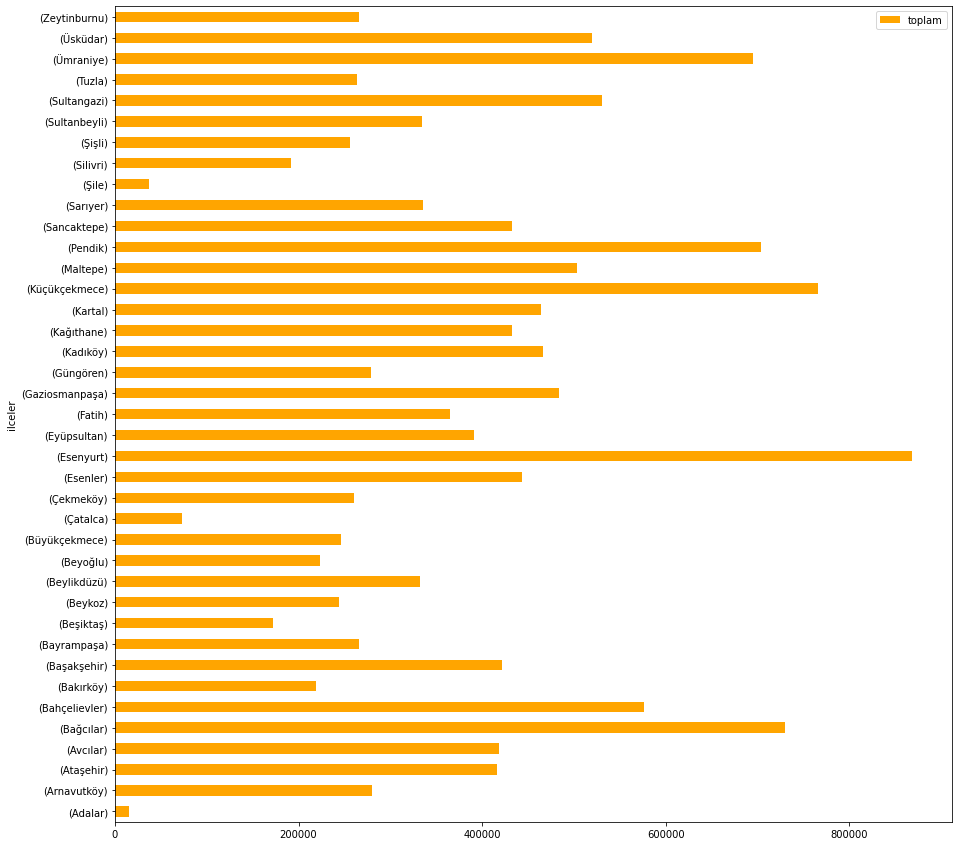

In [15]:
istanbuldan_illere.plot.barh(x='ilceler',y='toplam',color='Orange',figsize=(15,15))

In [11]:
il = istanbul_dis_nufus.sum(axis=0)
il = pd.DataFrame(il,columns=['toplam'])
il = il.drop(['ilceler','İstanbul'])
il


toplam
Adana            95937
Adıyaman        203974
Afyonkarahisar   60784
Ağrı            203500
Aksaray          50008
...                ...
Uşak             21749
Van             230223
Yalova           21518
Yozgat          150504
Zonguldak       125189

[80 rows x 1 columns]

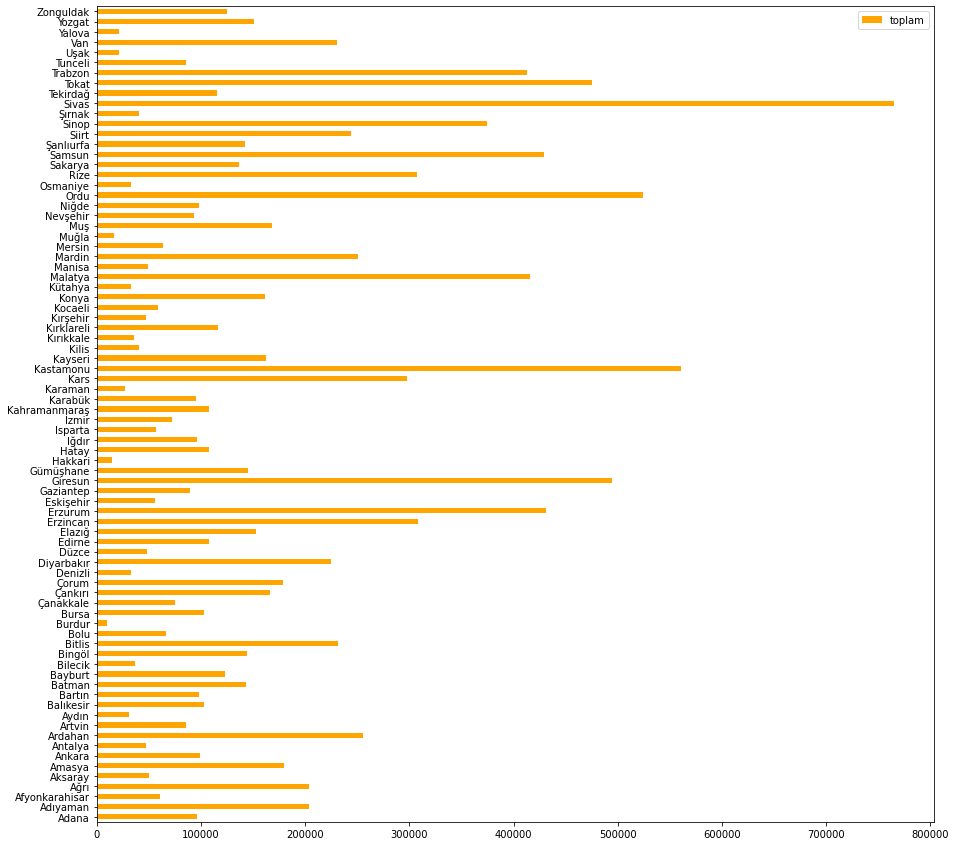

In [12]:
il.plot.barh(figsize=(15,15),color='Orange')

Tuik 2010 verilerine dayanarak 2011'de meydana gelen Van depreminden önce Van nüfusu 1.035.418 dir. Türk Tabipler Birliğinin Sunmuş olduğu VAN Depremi İkinci Ay Değerlendirme Raporu'na Göre Van Depreminden sonra insanların %60'ı başka şehirlere göç etmişlerdir. Nüfus ile oranladığımız zaman bu rakamın 620000 civarında olduğu ortaya çıkmıştır. 

Aynı oranı İstanbul nüfusuna oranlarsak:

In [13]:
istanbul_nufus = 15519267
goc = (istanbul_nufus * 60 )//100
print('Deprem Sonrası Göç Edecek İnsan Sayısı : ',goc)

Deprem Sonrası Göç Edecek İnsan Sayısı :  9311560


T.C.Van Yüzüncü Yıl Üniversitesi Bilimsel Araştırma Projeleri Koordinasyon Birimi Proje Raporuna göre Van Depreminin ardından 250000 insan şehri geçici olarak terketmiştir.

In [14]:
van_nufus = 1035418
istanbul_goc = (((100 * 250000) // van_nufus) * istanbul_nufus)//100
print('Deprem Sonrası Göç Edecek İnsan Sayısı : ',istanbul_goc)

Deprem Sonrası Göç Edecek İnsan Sayısı :  3724624
